In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
%matplotlib inline
import numpy as np

In [2]:
city_df = pd.read_csv("Resources/city_data.csv")

In [3]:
#can see that we have 3 columns: city, driver_count and type
#data type for city: string, for driver_count: numbers, for type: string
#120 rows with 3 cols
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
ride_df = pd.read_csv("Resources/ride_data.csv")

In [5]:
#4 columns: city, data, fare and ride_id
#2375 rows, 4 cols
ride_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [6]:
#see that we have no missing data for any column
city_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
#city and type as object, driver count as integer
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
#66 urban, 36 suburban, 18 rural 
city_df.value_counts("type")

type
Urban       66
Suburban    36
Rural       18
dtype: int64

In [9]:
#also see no missing data
ride_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [10]:
#city and date object, fare as float, ride_id as integer
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [11]:
#merging the 2 dataframes, do it with a column with the same data and the same col name in both dataframes 
#in this example, both have city so merge on it

pyber_df = pd.merge(city_df , ride_df , how = "left" , on = ["city" , "city"])

In [12]:
pyber_df

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2019-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2019-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2019-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2019-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2019-04-17 02:26:37,23.00,720020655850
...,...,...,...,...,...,...
2370,Jessicaport,1,Rural,2019-01-31 17:57:25,58.29,623154556195
2371,South Saramouth,7,Rural,2019-02-20 16:32:36,44.29,3622365199969
2372,South Saramouth,7,Rural,2019-01-28 15:55:33,31.25,7118046558393
2373,South Saramouth,7,Rural,2019-03-27 21:07:16,11.87,170351888128


In [13]:
#creating dataframes for each type of city

urban_cities = pyber_df[pyber_df["type"] == "Urban"]
suburban_cities = pyber_df[pyber_df["type"] == "Suburban"]
rural_cities = pyber_df[pyber_df["type"] == "Rural"]

In [14]:
urban_ride_count = urban_cities.value_counts("city")
suburban_ride_count = suburban_cities.value_counts("city")
rural_ride_count = rural_cities.value_counts("city")

In [15]:
urban_avg_fare = urban_cities.groupby("city").mean()["fare"]
suburban_avg_fare = suburban_cities.groupby("city").mean()["fare"]
rural_avg_fare = rural_cities.groupby("city").mean()["fare"]

/var/folders/9m/xp265wv97bl6mhlqzr9f1wcr0000gn/T/ipykernel_89429/4269192313.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  urban_avg_fare = urban_cities.groupby("city").mean()["fare"]
/var/folders/9m/xp265wv97bl6mhlqzr9f1wcr0000gn/T/ipykernel_89429/4269192313.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  suburban_avg_fare = suburban_cities.groupby("city").mean()["fare"]
/var/folders/9m/xp265wv97bl6mhlqzr9f1wcr0000gn/T/ipykernel_89429/4269192313.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Ei

In [16]:
urban_driver_cnt = urban_cities.groupby("city").mean()["driver_count"]
suburban_driver_cnt = suburban_cities.groupby("city").mean()["driver_count"]
rural_driver_cnt = rural_cities.groupby("city").mean()["driver_count"]

/var/folders/9m/xp265wv97bl6mhlqzr9f1wcr0000gn/T/ipykernel_89429/3919783533.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  urban_driver_cnt = urban_cities.groupby("city").mean()["driver_count"]
/var/folders/9m/xp265wv97bl6mhlqzr9f1wcr0000gn/T/ipykernel_89429/3919783533.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  suburban_driver_cnt = suburban_cities.groupby("city").mean()["driver_count"]
/var/folders/9m/xp265wv97bl6mhlqzr9f1wcr0000gn/T/ipykernel_89429/3919783533.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will 

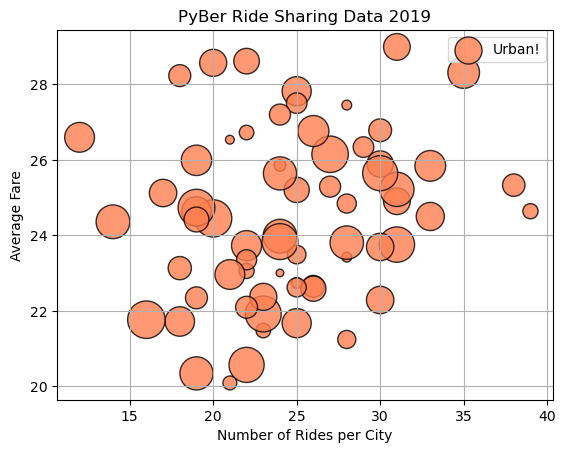

In [17]:
plt.scatter(urban_ride_count , urban_avg_fare , s = 10*urban_driver_cnt , c = "coral" , edgecolor = "black" , linewidths = 1 , alpha = 0.8, label = "Urban!")
plt.title("PyBer Ride Sharing Data 2019")
plt.ylabel("Average Fare")
plt.xlabel("Number of Rides per City")
plt.grid()
plt.legend()


plt.show()

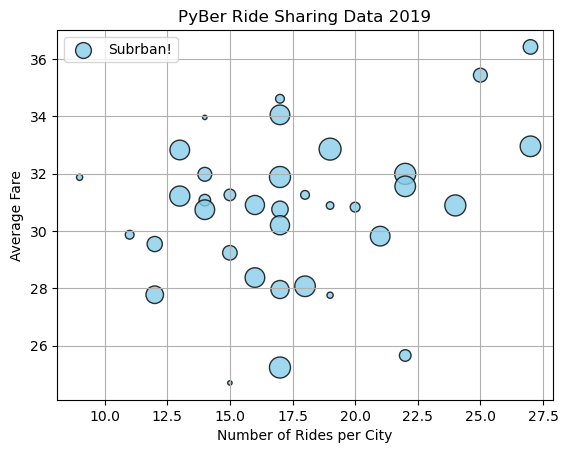

In [18]:
plt.scatter(suburban_ride_count , suburban_avg_fare , s = 10*suburban_driver_cnt , c = "skyblue" , edgecolor = "black" , linewidths = 1 , alpha = 0.8, label = "Subrban!")
plt.title("PyBer Ride Sharing Data 2019")
plt.ylabel("Average Fare")
plt.xlabel("Number of Rides per City")
plt.grid()
plt.legend()


plt.show()

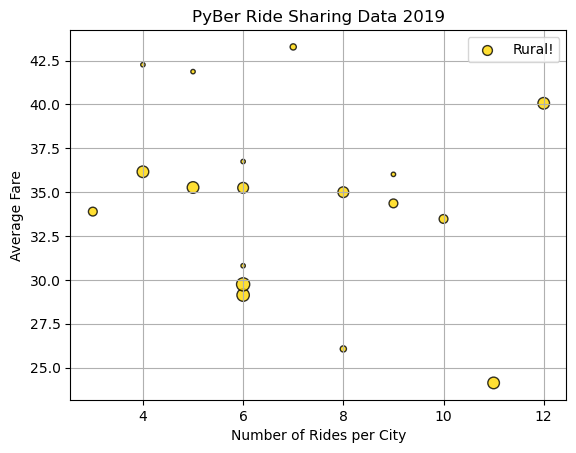

In [19]:
plt.scatter(rural_ride_count , rural_avg_fare , s = 10*rural_driver_cnt , c = "gold" , edgecolor = "black" , linewidths = 1 , alpha = 0.8, label = "Rural!")
plt.title("PyBer Ride Sharing Data 2019")
plt.ylabel("Average Fare")
plt.xlabel("Number of Rides per City")
plt.grid()
plt.legend()


plt.show()

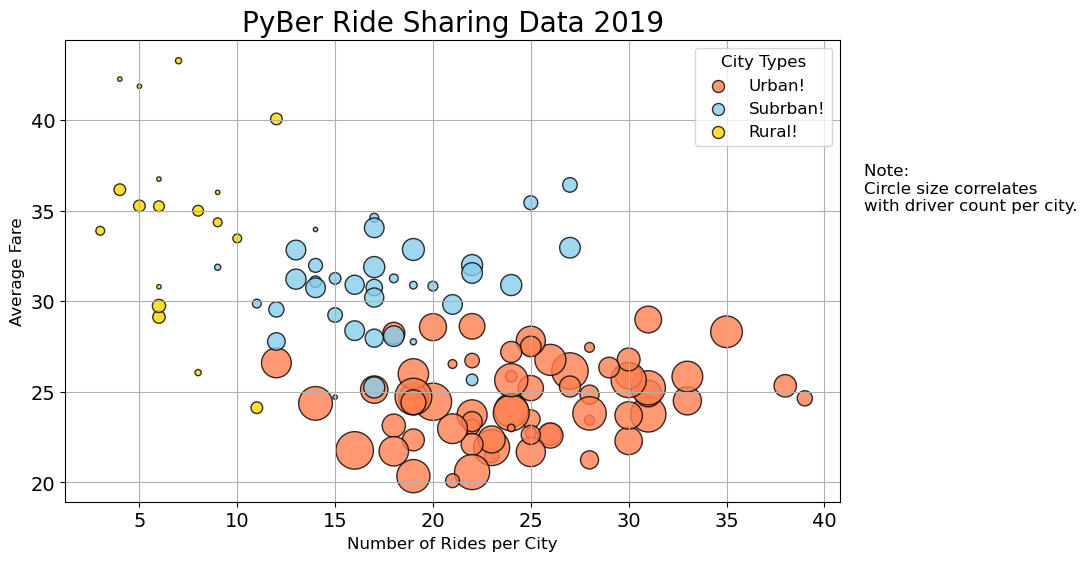

In [48]:
#to combine the three above charts into one add all scatter charts to one cell then run it 

plt.subplots(figsize = (10,6))

plt.scatter(urban_ride_count , urban_avg_fare , s = 10*urban_driver_cnt , c = "coral" , edgecolor = "black" , linewidths = 1 , alpha = 0.8, label = "Urban!")
plt.scatter(suburban_ride_count , suburban_avg_fare , s = 10*suburban_driver_cnt , c = "skyblue" , edgecolor = "black" , linewidths = 1 , alpha = 0.8, label = "Subrban!")
plt.scatter(rural_ride_count , rural_avg_fare , s = 10*rural_driver_cnt , c = "gold" , edgecolor = "black" , linewidths = 1 , alpha = 0.8, label = "Rural!")

plt.title("PyBer Ride Sharing Data 2019" , fontsize = 20)
plt.ylabel("Average Fare" , fontsize = 12)
plt.xlabel("Number of Rides per City" , fontsize = 12)
plt.grid()

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(42, 35, "Note: \nCircle size correlates \nwith driver count per city.", fontsize="12")

plt.savefig("Analysis/CutOff1.png" , bbox_inches = "tight")


In [21]:
urban_cities.describe()[["driver_count" , "fare"]]
#suburban_cities.describe()[["driver_count" , "fare"]]
#rural_cities.describe()[["driver_count" , "fare"]]

,driver_count,fare
count,1625.000000,1625.000000
mean,36.678154,24.525772
std,20.075545,11.738649
min,3.000000,4.050000
25%,22.000000,14.550000
50%,37.000000,24.640000
75%,52.000000,34.580000
max,73.000000,44.970000


In [22]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
dtype: float64

In [23]:
#can also do this:
#urban_ride_count.mean(), suburban_ride_count.mean()
#and to make it to be just 2 decimal places:
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2)

(24.62, 17.36)

In [24]:
#urban_ride_count.median()

#see that we have 2 modes
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [25]:
import scipy.stats as sts

In [26]:
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [27]:
urban_fares = urban_cities["fare"]
#round(urban_fares.mean(),2)
rural_fares = rural_cities["fare"]
suburban_fares = suburban_cities["fare"]

In [28]:
#gets a whole number
round(suburban_cities["driver_count"].mean(),0)

14.0

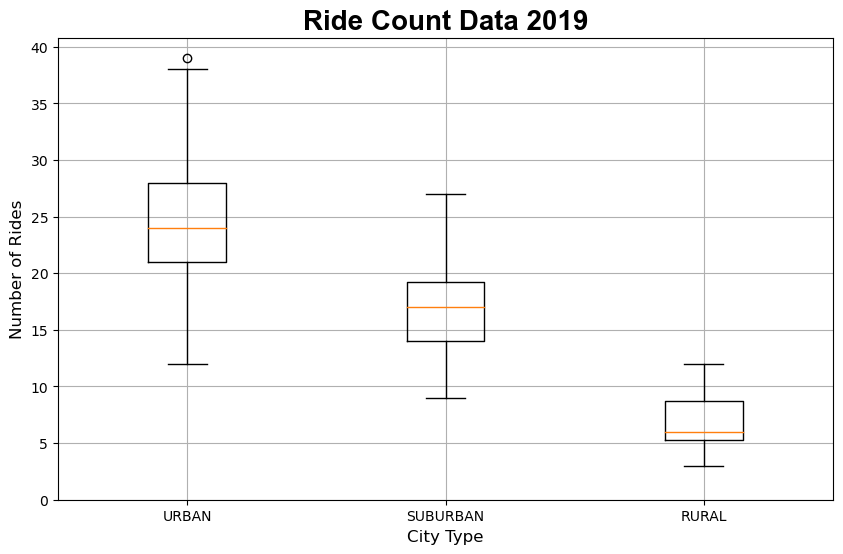

In [29]:
x_labels = ["URBAN" , "SUBURBAN" , "RURAL"]
fig, ax = plt.subplots(figsize = (10,6))
data = [urban_ride_count , suburban_ride_count, rural_ride_count]
ax.boxplot(data, labels = x_labels)

ax.set_title("Ride Count Data 2019" , fontsize = 20 , fontname = "Arial" , fontweight = "bold")
ax.set_ylabel("Number of Rides" , fontsize = 12)
ax.set_xlabel("City Type" , fontsize = 12)
ax.set_yticks(np.arange(0,40.1, step=5))
ax.grid()

plt.savefig("Analysis/Fig2.png")
plt.show()


In [30]:
urban_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_outlier} is the city with the outlier")

West Angela is the city with the outlier


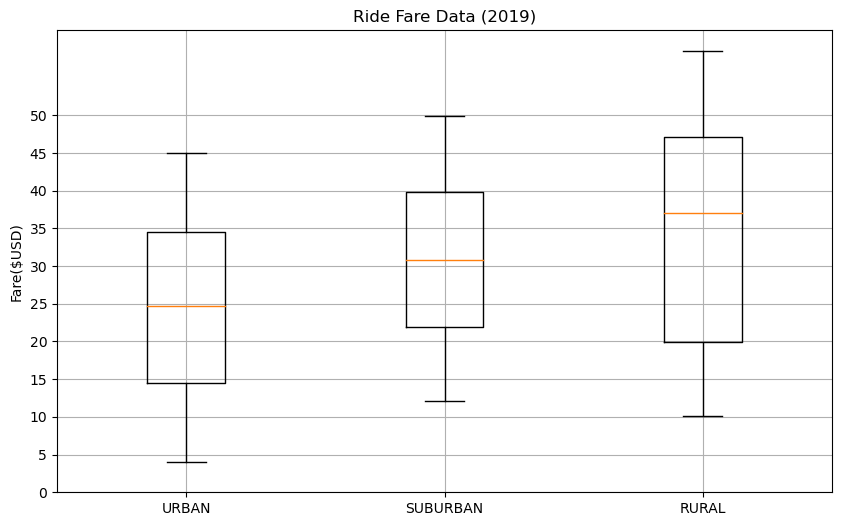

Summary Statistics


(count    1625.0
 mean       25.0
 std        12.0
 min         4.0
 25%        15.0
 50%        25.0
 75%        35.0
 max        45.0
 Name: fare, dtype: float64,
 count    625.0
 mean      31.0
 std       11.0
 min       12.0
 25%       22.0
 50%       31.0
 75%       40.0
 max       50.0
 Name: fare, dtype: float64,
 count    125.0
 mean      35.0
 std       15.0
 min       10.0
 25%       20.0
 50%       37.0
 75%       47.0
 max       59.0
 Name: fare, dtype: float64)

In [31]:
x_labels = ["URBAN" , "SUBURBAN" , "RURAL"]
data = [urban_fares , suburban_fares, rural_fares]
fig,ax = plt.subplots(figsize = (10,6))

ax.boxplot(data, labels = x_labels)
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5))
ax.grid()

plt.savefig("Analysis/Fig3.png")

plt.show()
print("Summary Statistics")
round(urban_fares.describe(),0) , round(suburban_fares.describe(),0), round(rural_fares.describe(),0)


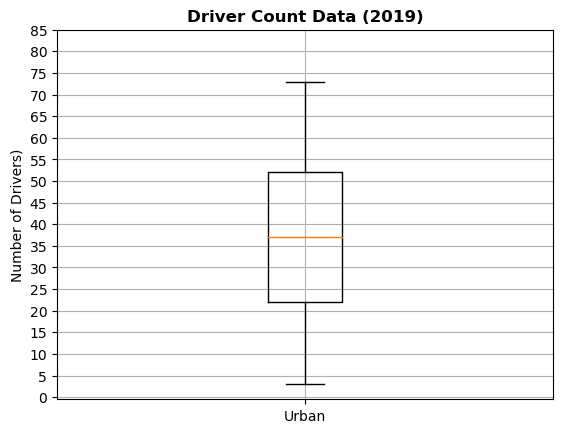

Summary Statistics


count    1625.0
mean       36.7
std        20.1
min         3.0
25%        22.0
50%        37.0
75%        52.0
max        73.0
Name: driver_count, dtype: float64

In [32]:
urban_drivers = urban_cities["driver_count"]

x_labels = ["Urban"]

fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)

ax.set_title('Driver Count Data (2019)' , fontweight = "bold")
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5))
ax.grid()

plt.show()

print("Summary Statistics")
round(urban_drivers.describe(),1)


In [33]:
pyber_df.groupby("type").sum()["fare"]

/var/folders/9m/xp265wv97bl6mhlqzr9f1wcr0000gn/T/ipykernel_89429/181450700.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pyber_df.groupby("type").sum()["fare"]


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [34]:
sum_of_fares = pyber_df["fare"].sum()
sum_of_fares

63538.64

In [35]:
#can create a pie chart with this data, need an array with the values and labels to be plotted!! 

type_percents = round((pyber_df.groupby("type").sum()["fare"]) / sum_of_fares * 100,1)

/var/folders/9m/xp265wv97bl6mhlqzr9f1wcr0000gn/T/ipykernel_89429/3059823305.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  type_percents = round((pyber_df.groupby("type").sum()["fare"]) / sum_of_fares * 100,1)


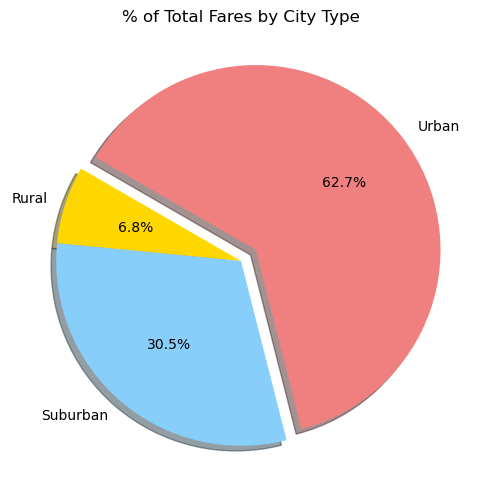

In [36]:
import matplotlib as mpl

plt.subplots(figsize = (10,6))

plt.pie(type_percents , labels = ["Rural" , "Suburban" , "Urban"] , colors=['gold' , 'lightskyblue' , 'lightcoral'], explode = [0,0,0.1], autopct='%1.1f%%', shadow = True, startangle=150)
plt.title("% of Total Fares by City Type")
mpl.rcParams["font.size"] = 14

plt.savefig("Analysis/Fig5.png")

plt.show()

In [37]:
pyber_df.value_counts("type")

type
Urban       1625
Suburban     625
Rural        125
dtype: int64

In [38]:
sum_of_rides = pyber_df.count()["city"]
sum_of_rides
#city as arbitrary

2375

In [39]:
data = round(pyber_df.value_counts("type") / sum_of_rides * 100,1)

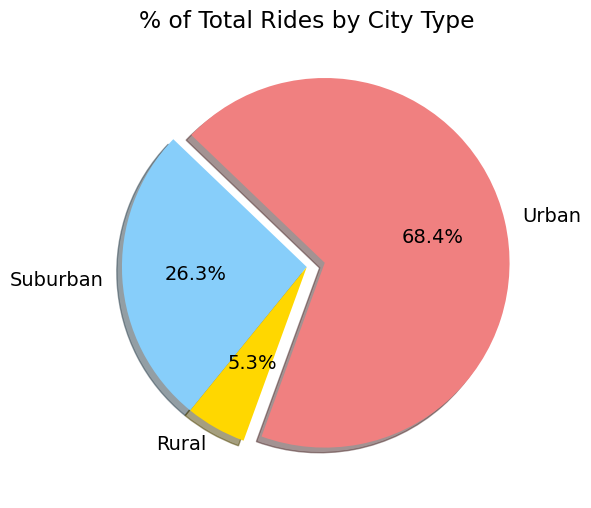

In [40]:
plt.subplots(figsize = (10,6))

plt.pie(data , labels = ["Urban" , "Suburban" , "Rural"] , colors=['lightcoral' , 'lightskyblue' , 'gold'], explode = [0.1,0,0], autopct='%1.1f%%', shadow = True, startangle=250)
plt.title("% of Total Rides by City Type")
mpl.rcParams["font.size"] = 14

plt.savefig("Analysis/Fig6.png")

plt.show()

In [41]:
# % of total drivers by city type 
sum_drivers = city_df["driver_count"].sum()

new_data = city_df.groupby("type").sum()["driver_count"] / sum_drivers * 100





/var/folders/9m/xp265wv97bl6mhlqzr9f1wcr0000gn/T/ipykernel_89429/155257894.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_data = city_df.groupby("type").sum()["driver_count"] / sum_drivers * 100


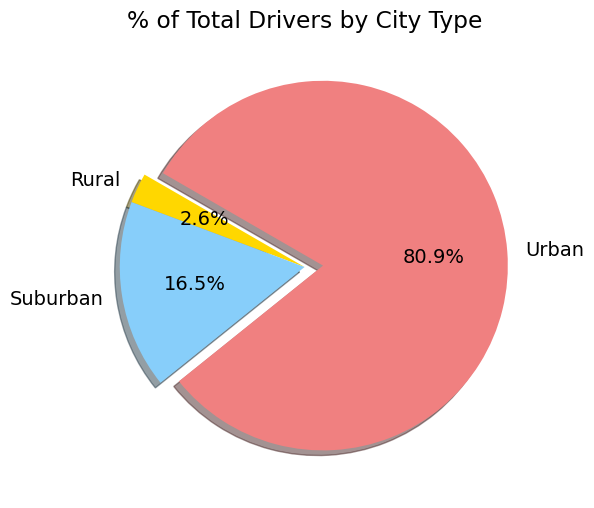

In [42]:
plt.subplots(figsize = (10,6))

plt.pie(new_data , labels = ["Rural" , "Suburban" , "Urban"] , colors=['gold' , 'lightskyblue' , 'lightcoral'], explode = [0,0,0.1], autopct='%1.1f%%', shadow = True, startangle=150)
plt.title("% of Total Drivers by City Type")
mpl.rcParams["font.size"] = 14

plt.savefig("Analysis/Fig7.png")

plt.show()